## We create snapshots of the flow, good for figures. 

In [1]:
# Import all the usual modules
#-------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#-------------------------------------
import parameters as p  
import functions as f   
#-------------------------------------

# Forcing wavenumber
n = 4

# Reynolds number
Re = 21

# Time & final time
t = 0.
T = 50.0
q=0

#timestep 
dt = 0.005
#Resolution
Nx = 128
Ny = 128

#Length of domain
Lx = 2*np.pi
Ly = 2*np.pi

#-------------------------------------
#-------------------------------------

# Set everything up in advance, and the initial condition
u = f.init(Nx,Ny,Lx,Ly,n,dt,Re)

#variables used for plotting animation (check this is the best implementation)
iplot = 0
tmax = int(T/dt)

nsnaps = 101
nstep = int(np.floor(T/dt))
pstep = int(np.ceil(nstep/(nsnaps)))

unew = np.zeros((Ny,Nx//2+1),dtype=complex)
uplot = np.zeros((Ny,Nx,nsnaps))
 

### Here's the timestep cell

In [2]:
for i in range(nstep):
    unew = p.cn1*((p.cn2*u) + f.rk4(u))   # timestep update

    #--- Plot saving
        
    if(int(t/dt) % pstep == 0): # Save for plotting
        uplot[:,:,iplot] = np.fft.irfft2(unew[:,:])*(Nx*Ny) 
        iplot = iplot+1
    
    u = unew       
    t = t + dt 

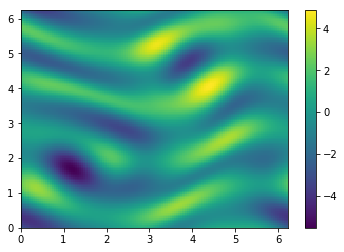

In [4]:
x = np.linspace(0,Lx-p.dx,Nx)
y = np.linspace(0,Ly-p.dy,Ny)
[xx,yy] = np.meshgrid(x,y)

plt.pcolor(xx,yy,uplot[:,:,20])
plt.colorbar()
plt.savefig('newwave3.png')
plt.show()